In [2]:
import numpy as np
from state_gate_class import State, Gate
from useful_states_gates import *
import random
import matplotlib.pyplot as plt

# single-qubit Ciruit

In [3]:
def rotation(theta,U):
    return (I * np.cos(theta/2)) + (U * 1j * np.sin(theta/2))

def controlled_U(U,reverse=False):
    if not reverse:
        return proj_zero**I + proj_one**U
    return I**proj_zero + U**proj_one

# Circuit A
circuit_A = lambda theta : H @ rotation(theta, Z)

# Circuit B
circuit_B = lambda theta, phi : H @ rotation(theta, Z) @ rotation(phi, X)

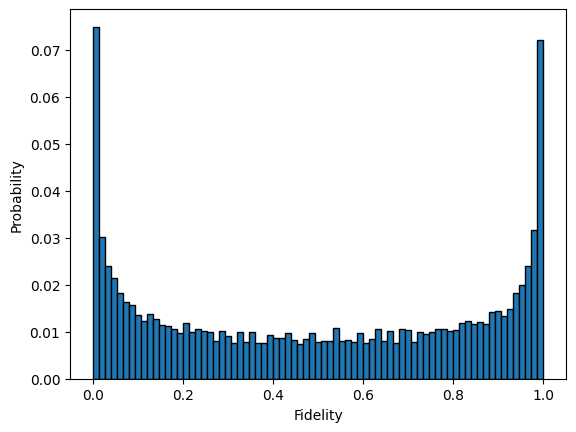

In [4]:
theta_List = np.linspace(0, 2*np.pi, 1000)
phi_List = np.linspace(0, 2*np.pi, 1000)

N = 100000

qubit_A = [None] * N
qubit_B = [None] * N

for i in range(N):
    qubit_A[i] = circuit_A(random.choice(theta_List)) @ zero_state
    qubit_B[i] = circuit_B(random.choice(theta_List), random.choice(phi_List)) @ zero_state

def fidelity(state1, state2):
    return np.abs(np.vdot(state1.vector, state2.vector))**2

fidelity_A = [fidelity(qubit_A[2*i], qubit_A[2*i+1]) for i in range (N//2)]
fidelity_B = [fidelity(qubit_B[2*i], qubit_B[2*i+1]) for i in range (N//2)]

# Create a histogram
counts_A, bins = np.histogram(fidelity_A, bins=75)
counts_B, bins = np.histogram(fidelity_B, bins=75)

norm_counts_A = counts_A / np.sum(counts_A)
norm_counts_B = counts_B / np.sum(counts_B)
    
haar_dstr = lambda f, N: (N-1) *(1-f)**(N-2)


# Plot the normalized histogram
plt.bar(bins[:-1], norm_counts_A, width=np.diff(bins), align='edge', edgecolor='black')
#plt.bar(bins[:-1], norm_counts_B, width=np.diff(bins), align='edge', edgecolor='black')
plt.xlabel('Fidelity')
plt.ylabel('Probability')
plt.show()


